# Predicting Marketing Efforts: SEO Advertising, Brand Advertising, and Retailer Support

Let's look at predicting the average Brand Advertising Efforts and Search Engine Optimization Efforts

This helps us make more accurate decisions in BSG and identify if we'll hit the shareholder expectations for the period.

In [1]:
#let's grab a few packages for stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Let's set some variables that we'll change each round
#Change this year to the year being predicted (i.e. if you're predicting year 16, enter '16')
predictionYear = 19 

#Load the dataset from our bsg_prices_actual - Sheet1.csv
df = pd.read_csv('bsg_marketing_actual - Sheet1.csv')
df

,ID,YEAR,NA_SEO,NA_ADVERTISING,NA_RETAIL_SUPPORT,EU_SEO,EU_ADVERTISING,EU_RETAIL_SUPPORT,AP_SEO,AP_ADVERTISING,AP_RETAIL_SUPPORT,LA_SEO,LA_ADVERTISING,LA_RETAIL_SUPPORT
0,4,14,7825,18750,3575,7600,20550,3575,6850,19850,3350,7875,22450,4325
1,5,15,9200,21000,3250,9900,25250,3250,8225,22750,3025,11250,25800,4375
2,6,16,9725,22750,3300,9650,25900,3225,8525,23450,3300,10675,26000,2195
3,7,17,11150,22000,3425,9550,24300,3275,8900,22500,3275,11525,24500,3625
4,8,18,9850,18700,3450,9700,21350,3450,8475,22200,3275,10525,21300,3875


## Functions
1. Slope Intercept
2. Print Slope as Formula
3. Hypothetical Slope and Intercept from our data
4. Print the Predicted Year using Hypothetical Slope and Intercept

In [2]:
#1. Slope Intercept Function
#Function to find the slope intercept of a first degree polynomial
def getSlope(x,y): #pass in the x value, y value, and a string for printing
    slope, intercept = np.polyfit(x,y,1).round(decimals = 4) #compute the slope
    return slope, intercept

#2. Print Slope as Formulas
#Function to print the slope
def printSlope(x,y,string):
    slope, intercept = np.polyfit(x,y,1).round(decimals = 4)
    printed_string = string + '= ' + str(slope) + 'x + ' + str(intercept)
    return printed_string 

#3. Hypothetical Slope and Intercept from our data
x_theor = np.array([14,predictionYear]) #set x_theor as it will be used in all our Linear Models
def getYTheor(slope, x_theor, intercept): #pass in the slope, x_theor, and intercept
    y_theor = slope * x_theor + intercept
    return y_theor

#4. Print Predicted Year using Hypothetical Slope and Intercept
def printPrediction(slope, intercept, string): 
    prediction = 'Year ' + str(predictionYear) + ' ' + string +' predicted price: ' + str(slope * predictionYear + intercept)
    return prediction

### Find Slope Intercept for each segment

In [3]:
# variable assignments
x = np.array(df['YEAR'])
y_na_seo = np.array(df['NA_SEO'])
y_na_advertising = np.array(df['NA_ADVERTISING'])
y_na_retailsup = np.array(df['NA_RETAIL_SUPPORT'])
y_eu_seo = np.array(df['EU_SEO'])
y_eu_advertising = np.array(df['EU_ADVERTISING'])
y_eu_retailsup = np.array(df['EU_RETAIL_SUPPORT'])
y_ap_seo = np.array(df['AP_SEO'])
y_ap_advertising = np.array(df['AP_ADVERTISING'])
y_ap_retailsup = np.array(df['AP_RETAIL_SUPPORT'])
y_la_seo = np.array(df['LA_SEO'])
y_la_advertising = np.array(df['LA_ADVERTISING'])
y_la_retailsup = np.array(df['LA_RETAIL_SUPPORT'])

#print the slope in y=mx+b form
print(printSlope(x,y_na_seo,'NA SEO'))
print(printSlope(x,y_na_advertising,'NA Advertising'))
print(printSlope(x,y_na_retailsup,'NA Retailer Support'))
print(printSlope(x,y_eu_seo,'EU SEO'))
print(printSlope(x,y_eu_advertising,'EU Advertising'))
print(printSlope(x,y_eu_retailsup,'EU Retailer Support'))
print(printSlope(x,y_ap_seo,'AP SEO'))
print(printSlope(x,y_ap_advertising,'AP Advertising'))
print(printSlope(x,y_ap_retailsup,'AP Retailer Support'))
print(printSlope(x,y_la_seo,'LA SEO'))
print(printSlope(x,y_la_advertising,'LA Advertising'))
print(printSlope(x,y_la_retailsup,'LA Retailer Support'))


NA SEO= 600.0x + -50.0
NA Advertising= 90.0x + 19200.0
NA Retailer Support= -7.5x + 3520.0
EU SEO= 385.0x + 3120.0
EU Advertising= 65.0x + 22430.0
EU Retailer Support= -22.5x + 3715.0
AP SEO= 392.5x + 1915.0
AP Advertising= 445.0x + 15030.0
AP Retailer Support= 10.0x + 3085.0
LA SEO= 557.5x + 1450.0
LA Advertising= -360.0x + 29770.0
LA Retailer Support= -165.0x + 6319.0


### North America SEO, Advertising, and Retailer Support Predictions
* SEO: Search Engine Optimization Advertising 000s dollars
* Advertising: Wholesale Brand Advertising 000s dollars
* Retailer Support: dollars per outlet

Year 19 SEO predicted price: 11350.0
Year 19 Brand Advertising predicted price: 20910.0
Year 19 Retailer Support predicted price: 3377.5


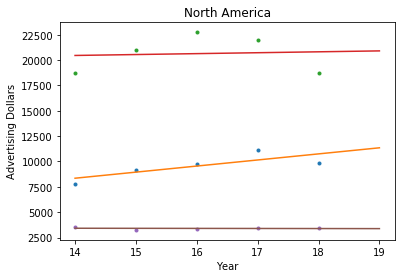

In [4]:
#grab the slope and intercepts for NA 
na_seo_slope, na_seo_intercept = getSlope(x,y_na_seo)
na_advertising_slope,na_advertising_intercept = getSlope(x,y_na_advertising)
na_retailsup_slope, na_retailsup_intercept = getSlope(x,y_na_retailsup)

#set the y theoretical for NA
seo_y_theor = getYTheor(na_seo_slope, x_theor, na_seo_intercept)
advertising_y_theor = getYTheor(na_advertising_slope,x_theor,na_advertising_intercept)
retailsup_y_theor = getYTheor(na_retailsup_slope, x_theor, na_retailsup_intercept)

#print the predicted price
print(printPrediction(na_seo_slope, na_seo_intercept, 'SEO'))
print(printPrediction(na_advertising_slope, na_advertising_intercept, 'Brand Advertising'))
print(printPrediction(na_retailsup_slope, na_retailsup_intercept, 'Retailer Support'))

#plot the anscombe data and theoretical lines
_ = plt.plot(x,y_na_seo,marker='.', linestyle='none')
_ = plt.plot(x_theor,seo_y_theor)
_ = plt.plot(x,y_na_advertising,marker='.', linestyle='none')
_ = plt.plot(x_theor,advertising_y_theor)
_ = plt.plot(x,y_na_retailsup,marker='.', linestyle='none')
_ = plt.plot(x_theor,retailsup_y_theor)

#label the axes
plt.xlabel('Year')
plt.ylabel('Advertising Dollars')
plt.title('North America')
plt.show()

### Europe Africa SEO, Advertising, and Retailer Support Predictions
* SEO: Search Engine Optimization Advertising 000s dollars
* Advertising: Wholesale Brand Advertising 000s dollars
* Retailer Support: dollars per outlet

Year 19 SEO predicted price: 10435.0
Year 19 Brand Advertising predicted price: 23665.0
Year 19 Retailer Support predicted price: 3287.5


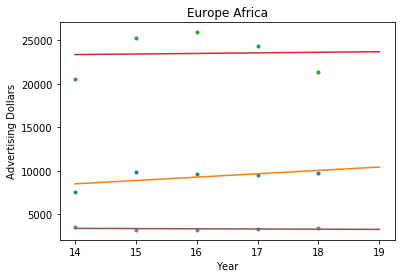

In [5]:
#grab the slope and intercepts for EU 
eu_seo_slope, eu_seo_intercept = getSlope(x,y_eu_seo)
eu_advertising_slope, eu_advertising_intercept = getSlope(x,y_eu_advertising)
eu_retailsup_slope, eu_retailsup_intercept = getSlope(x,y_eu_retailsup)

#set the y theoretical for EU 
seo_y_theor = getYTheor(eu_seo_slope, x_theor, eu_seo_intercept)
advertising_y_theor = getYTheor(eu_advertising_slope,x_theor,eu_advertising_intercept)
retailsup_y_theor = getYTheor(eu_retailsup_slope, x_theor, eu_retailsup_intercept)

#print the predicted price
print(printPrediction(eu_seo_slope, eu_seo_intercept, 'SEO'))
print(printPrediction(eu_advertising_slope, eu_advertising_intercept, 'Brand Advertising'))
print(printPrediction(eu_retailsup_slope, eu_retailsup_intercept, 'Retailer Support'))

#plot the anscombe data and theoretical lines
_ = plt.plot(x,y_eu_seo,marker='.', linestyle='none')
_ = plt.plot(x_theor,seo_y_theor)
_ = plt.plot(x,y_eu_advertising,marker='.', linestyle='none')
_ = plt.plot(x_theor,advertising_y_theor)
_ = plt.plot(x,y_eu_retailsup,marker='.', linestyle='none')
_ = plt.plot(x_theor,retailsup_y_theor)

#label the axes
plt.xlabel('Year')
plt.ylabel('Advertising Dollars')
plt.title('Europe Africa')
plt.show()

### Asia Pacific SEO, Advertising, and Retailer Support Predictions
* SEO: Search Engine Optimization Advertising 000s dollars
* Advertising: Wholesale Brand Advertising 000s dollars
* Retailer Support: dollars per outlet

Year 19 SEO predicted price: 9372.5
Year 19 Brand Advertising predicted price: 23485.0
Year 19 Retailer Support predicted price: 3275.0


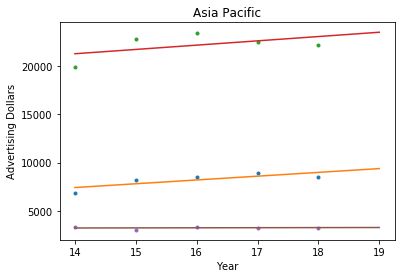

In [6]:
#grab the slope and intercepts for AP
ap_seo_slope, ap_seo_intercept = getSlope(x,y_ap_seo)
ap_advertising_slope, ap_advertising_intercept = getSlope(x,y_ap_advertising)
ap_retailsup_slope, ap_retailsup_intercept = getSlope(x,y_ap_retailsup)

#set the y theoretical for AP
seo_y_theor = getYTheor(ap_seo_slope, x_theor, ap_seo_intercept)
advertising_y_theor = getYTheor(ap_advertising_slope,x_theor,ap_advertising_intercept)
retailsup_y_theor = getYTheor(ap_retailsup_slope, x_theor, ap_retailsup_intercept)

#print the predicted price
print(printPrediction(ap_seo_slope, ap_seo_intercept, 'SEO'))
print(printPrediction(ap_advertising_slope, ap_advertising_intercept, 'Brand Advertising'))
print(printPrediction(ap_retailsup_slope, ap_retailsup_intercept, 'Retailer Support'))

#plot the anscombe data and theoretical lines
_ = plt.plot(x,y_ap_seo,marker='.', linestyle='none')
_ = plt.plot(x_theor,seo_y_theor)
_ = plt.plot(x,y_ap_advertising,marker='.', linestyle='none')
_ = plt.plot(x_theor,advertising_y_theor)
_ = plt.plot(x,y_ap_retailsup,marker='.', linestyle='none')
_ = plt.plot(x_theor,retailsup_y_theor)

#label the axes
plt.xlabel('Year')
plt.ylabel('Advertising Dollars')
plt.title('Asia Pacific')
plt.show()

### Latin America SEO, Advertising, and Retailer Support Predictions
* SEO: Search Engine Optimization Advertising 000s dollars
* Advertising: Wholesale Brand Advertising 000s dollars
* Retailer Support: dollars per outlet

Year 19 SEO predicted price: 12042.5
Year 19 Brand Advertising predicted price: 22930.0
Year 19 Retailer Support predicted price: 3184.0


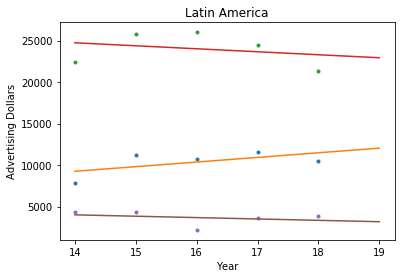

In [7]:
#grab the slope and intercepts for LA 
la_seo_slope, la_seo_intercept = getSlope(x,y_la_seo)
la_advertising_slope, la_advertising_intercept = getSlope(x,y_la_advertising)
la_retailsup_slope, la_retailsup_intercept = getSlope(x,y_la_retailsup)

#set the y theoretical for LA
seo_y_theor = getYTheor(la_seo_slope, x_theor, la_seo_intercept)
advertising_y_theor = getYTheor(la_advertising_slope,x_theor,la_advertising_intercept)
retailsup_y_theor = getYTheor(la_retailsup_slope, x_theor, la_retailsup_intercept)

#print the predicted price
print(printPrediction(la_seo_slope, la_seo_intercept, 'SEO'))
print(printPrediction(la_advertising_slope, la_advertising_intercept, 'Brand Advertising'))
print(printPrediction(la_retailsup_slope, la_retailsup_intercept, 'Retailer Support'))

#plot the anscombe data and theoretical lines
_ = plt.plot(x,y_la_seo,marker='.', linestyle='none')
_ = plt.plot(x_theor,seo_y_theor)
_ = plt.plot(x,y_la_advertising,marker='.', linestyle='none')
_ = plt.plot(x_theor,advertising_y_theor)
_ = plt.plot(x,y_la_retailsup,marker='.', linestyle='none')
_ = plt.plot(x_theor,retailsup_y_theor)

#label the axes
plt.xlabel('Year')
plt.ylabel('Advertising Dollars')
plt.title('Latin America')
plt.show()